c:\Users\namo\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003987. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\namo\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003821. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\namo\AppD

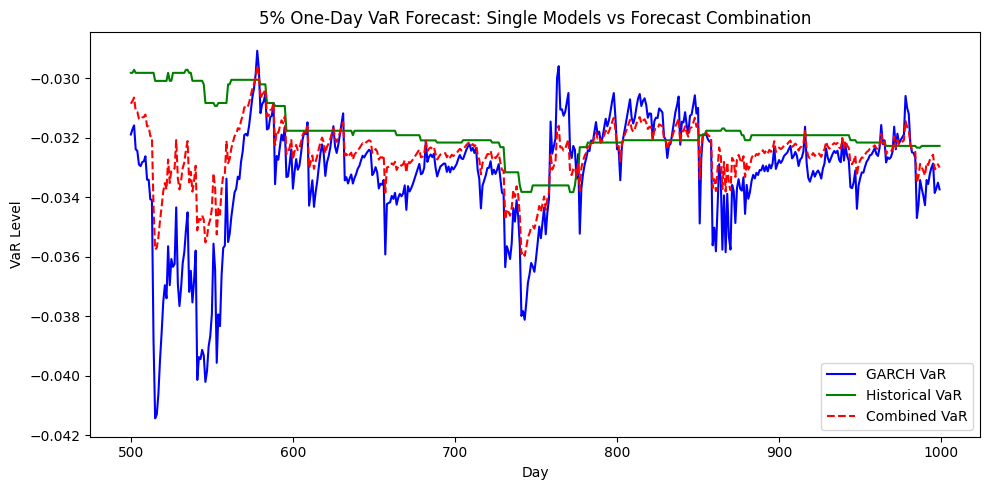

GARCH VaR violations: 23
Historical VaR violations: 30
Combined VaR violations: 26


In [3]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# --- Load Example Data (Daily Returns) ---
# Replace this with your actual financial returns data (e.g., S&P 500, FTSE)
# Example: Generating dummy returns for illustration
np.random.seed(420)
returns = np.random.normal(0, 0.02, 1000)  # 1000 days of synthetic returns
returns = pd.Series(returns)

# --- Define VaR confidence level ---
alpha = 0.05  # 5% VaR

# --- Simple Model 1: GARCH(1,1) VaR ---
garch = arch_model(returns, vol='Garch', p=1, q=1)
garch_result = garch.fit(disp='off')

garch_var_list = []
for i in range(500, len(returns)):  # Rolling forecast starting from day 500
    rolling_data = returns[:i]
    model = arch_model(rolling_data, vol='Garch', p=1, q=1)
    result = model.fit(disp='off')
    forecast_var = result.forecast(horizon=1).variance.values[-1][0]
    garch_var = -1.65 * np.sqrt(forecast_var)  # For 5% one-day VaR
    garch_var_list.append(garch_var)

# --- Simple Model 2: Historical Simulation VaR ---
hist_var_list = []
window_size = 500
for i in range(window_size, len(returns)):
    hist_window = returns[i-window_size:i]
    hist_var = np.percentile(hist_window, 100 * alpha)  # 5% Historical VaR
    hist_var_list.append(hist_var)

# --- Forecast Combination: Simple Average of GARCH and Historical VaR ---
combined_var_list = []
for garch_v, hist_v in zip(garch_var_list, hist_var_list):
    combined_var = (garch_v + hist_v) / 2
    combined_var_list.append(combined_var)

# --- Compare VaR Forecasts ---
forecast_dates = np.arange(window_size, len(returns))
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, garch_var_list, label='GARCH VaR', color='blue')
plt.plot(forecast_dates, hist_var_list, label='Historical VaR', color='green')
plt.plot(forecast_dates, combined_var_list, label='Combined VaR', color='red', linestyle='--')
plt.title('5% One-Day VaR Forecast: Single Models vs Forecast Combination')
plt.xlabel('Day')
plt.ylabel('VaR Level')
plt.legend()
plt.tight_layout()
plt.show()

# --- Simple Backtesting: VaR Violations ---
actual_returns = returns[window_size:]

garch_violations = np.sum(actual_returns.values < np.array(garch_var_list))
hist_violations = np.sum(actual_returns.values < np.array(hist_var_list))
combined_violations = np.sum(actual_returns.values < np.array(combined_var_list))

print(f"GARCH VaR violations: {garch_violations}")
print(f"Historical VaR violations: {hist_violations}")
print(f"Combined VaR violations: {combined_violations}")